# VERIFICA LEGGE DI MALUS:

$I(\alpha) = I_0\cos^2(\alpha)$

$\sigma_V$ = letti in base all'oscillazione del valore

$\sigma_\theta$ = 1°

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione2 import Interpolazione2,Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'malus.csv'
fr = pd.read_csv(FILE)

In [6]:
# import dati da csv

α = np.array(fr['alpha (deg)']) * np.pi / 180 # rad
V = np.array(fr['V (Volt)']) # Volt
# I = np.array(fr['I (mA)'])[0:11] # Ampere
# sigmaI = np.array(fr['sigmaI'])[0:11] # Ampere
sigmaV = np.array(fr['sigmaV']) # Volt
sigmaα = np.pi/180 # 1deg

Abbiamo due modelli possibili:
- Il nostro sensore misura l'intensità del fascio $I$
- Il nostro sensore misura l'ampiezza del campo elettrico $E$

Sappiamo che il fascio si tratta di microonde polarizzate linearmente

cerchiamo inoltre l'angolo in cui la polarizzazione è massima variando l'angolo del ricevitore

In [12]:
def legge_malus(α,I0,θ_0):
    return I0 * np.cos(α + θ_0)**2

def campo_polarizzato(α,E0,θ_0):
    return E0 * np.abs(np.cos(α - θ_0))

def error_prop(α,σα,arg,cov):
    [E0,θ] = arg
    [vE,vθ] = np.diag(cov)
    vEθ = cov[1][1]
    
    ddE = np.abs(np.cos(α - θ))
    ddα = E0*np.sign(np.cos(α - θ))*(-np.sin(α - θ))
    ddθ = -E0* np.sign(np.cos(α - θ))*(-np.sin(α - θ))
    
    return np.sqrt(ddE**2*vE + ddα**2*σα**2 + ddθ**2*vθ + 2*ddθ*ddE*vEθ)

malus_E = Interpolazione2(α, V, campo_polarizzato,error_prop, sigmaV,sigmaα,[0,0])
# old_malus_E = Interpolazione(α,V,campo_polarizzato,sigmaV,[0,0])
# print(old_malus_E.rchi2)
print(malus_E)
# malus_I = Interpolazione(α, I, campo_polarizzato, sigmaI,[0,0],names=['I0','offset'])

   
Parameters: [1.62127678 0.00391147] 
Sigma parameters: [0.01383514 0.00888191]

sigmaY: [0.01616094 0.01919277 0.02925976 0.02782404 0.03104944 0.03707998
 0.03281835 0.03563507 0.02796581 0.02374959 0.01934302 0.02373384
 0.01616094 0.02373384 0.02596445 0.02374959 0.03289508 0.03114254
 0.03281835 0.03707998 0.03555373 0.03277464 0.02358249 0.0258527
 0.02368915]

chi2: 2.04
chi2 ridotto: 0.09
pvalue: 99.3% 

dof: 23
covariance:
[[1.62010451e-04 3.25524137e-08]
 [3.25524137e-08 6.67711213e-05]]    




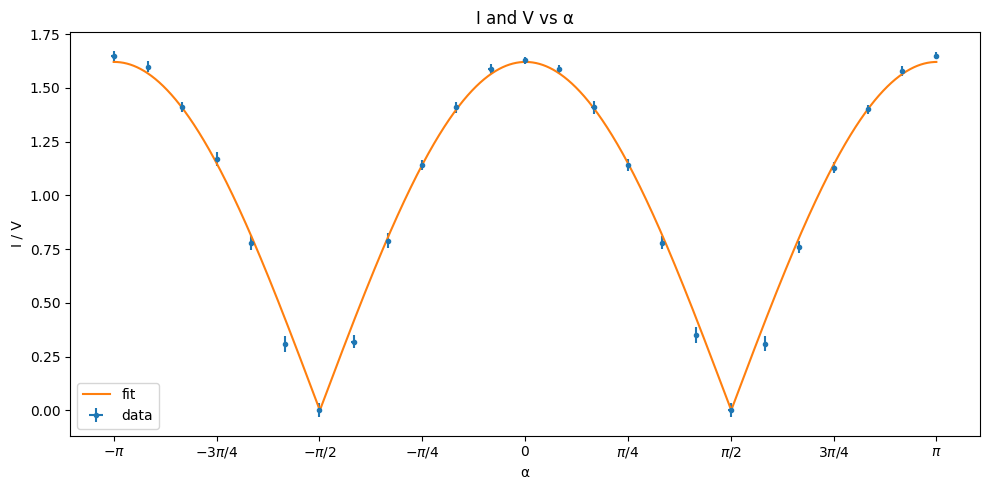

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot for V

ax.errorbar(α, V, yerr=malus_E.sigmaY,xerr=malus_E.sigmaX, fmt='.', label='data')

x = np.linspace(-np.pi,np.pi, 10000)
y = campo_polarizzato(x, *malus_E.bval)
ax.plot(x,y, label='fit')


ax.set_xticks([-np.pi,-3*np.pi/4,-np.pi/2,-np.pi/4,0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels(['$-\pi$','$-3\pi/4$','$-\pi/2$','$-\pi/4$','$0$','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$'])
ax.set_xlabel('α')
ax.set_ylabel('I / V')
ax.set_title('I and V vs α')
ax.legend()

plt.tight_layout()
plt.show()



le andature di tensione e di corrente seguono la legge $|\cos(x)|$, i nostri rilevatori leggono quindi l'ampiezza del campo elettrico